# Feature Engineering

Feature Engineering

## Imports

- Imports
  - `import seaborn as sns` results in an error: `no module name seaborn`
    - Resolve by installing the seaborn package via pip: `python3 -m pip install -U seaborn`
    - If you must upgrade pip: `pip install --upgrade pip`

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data

- Load the data
  - Pandas `read_excel` may result in error: `Missing optional dependency 'openpyxl'`
    - Resolve by installing `openpyxl` with: `python3 -m pip install -U openpyxl`

In [15]:
FILE_NAME = 'snail_size.xlsx'
snails = pd.read_excel(FILE_NAME, index_col=None)
snails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4177 non-null   object 
 1   length           4163 non-null   float64
 2   diameter         4163 non-null   float64
 3   height           4177 non-null   float64
 4   full_weight      4177 non-null   float64
 5   no_shell_weight  4177 non-null   float64
 6   core_weight      4177 non-null   float64
 7   shell_weight     4147 non-null   float64
 8   age              4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## Typo check

In [16]:
snails['gender'].value_counts()

gender
M          1528
Infant     1335
F          1307
Instant       7
Name: count, dtype: int64

### Correct misspelling

In [17]:
snails['gender'] = snails['gender'].replace('Instant', 'Infant')

## Categorical Data

- `ModuleNotFoundError`: No module named 'category_encoders'
  - Resolve by adding packages `apk add python3-dev build-base gfortran openblas-dev`
  - Then `python3 -m pip install -U category_encoders` and wait a very long time

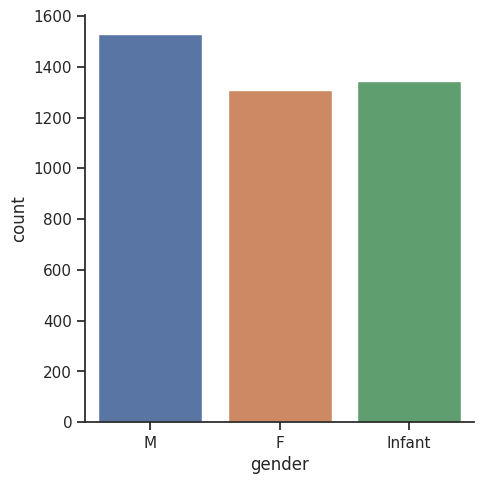

In [18]:
import category_encoders as ce

sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x='gender', kind='count', data=snails)

In [19]:
encoder = ce.OrdinalEncoder(cols=['gender'])
snails_encoded = encoder.fit_transform(snails)

snails['gender_type'] = snails_encoded['gender']
snails.head().T

,0,1,2,3,4
gender,M,M,F,M,Infant
length,0.455,0.35,0.53,0.44,0.33
diameter,0.365,0.265,0.42,0.365,0.255
height,0.095,0.09,0.135,0.125,0.08
full_weight,0.514,0.2255,0.677,0.516,0.205
no_shell_weight,0.2245,0.0995,0.2565,0.2155,0.0895
core_weight,0.101,0.0485,0.1415,0.114,0.0395
shell_weight,0.15,0.07,0.21,NaN,0.055
age,15,7,9,10,7
gender_type,1,1,2,1,3
